<a href="https://colab.research.google.com/github/amannraawat/dog-breed-classification/blob/master/dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Dog Breed Classification

This notebook builds and end-to-end multi-class classification using Tensorflow.

## Problem

Identifying the breed of dog from the image.

## Data

The data we are using is from Dog Breed Identification Competition(Kaggle).

https://www.kaggle.com/competitions/dog-breed-identification

In [ ]:
# unzip the data into the Google Drive.
# !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

### Get Our Workspace Ready

In [1]:
# import important libraries

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# check for GPU availability

print("GPU available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Get Our Data Ready (Turning into Tensors)

For machine learning models, all data has to be in numerical form. So turning our images into Tensors(numerical representations)

In [3]:
# checkout labels of our data
import pandas as pd
data = pd.read_csv('drive/My Drive/Dog Vision/labels.csv')

In [ ]:
data.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

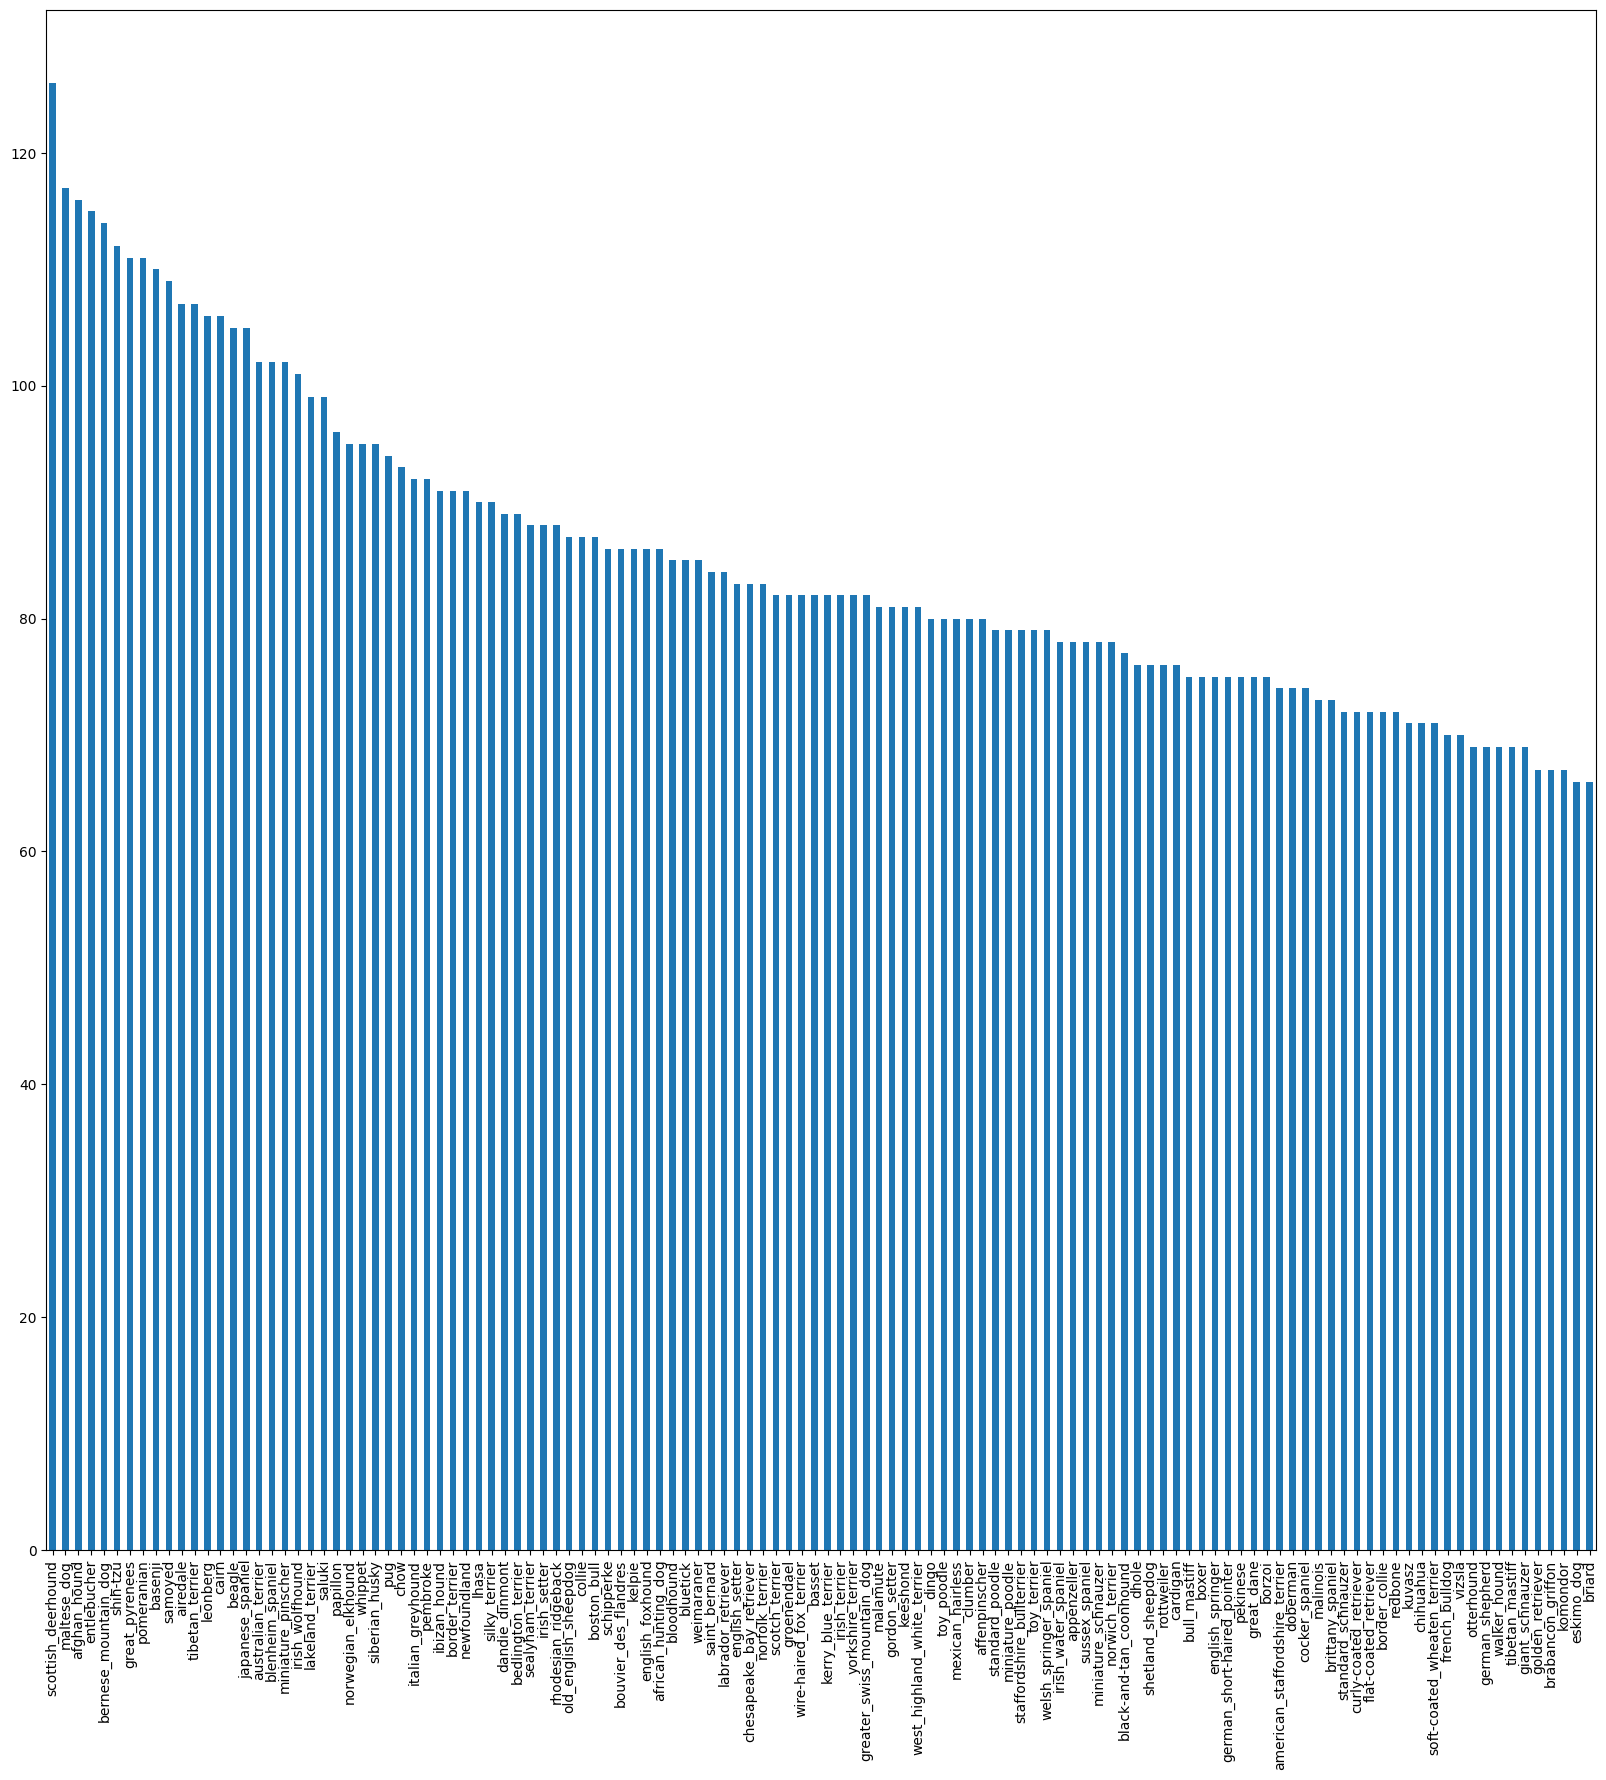

In [ ]:
data['breed'].value_counts().plot.bar(figsize=(20,20))

In [4]:
# view an image
from IPython.display import Image

In [ ]:
Image('drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')

## Get Images and their Labels

list of all image filepaths

In [5]:
filenames = ['drive/My Drive/Dog Vision/train/' + name for name in data['id'] + '.jpg']

In [ ]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# checkout filenames matches with the actual image files
import os
if len(os.listdir('drive/My Drive/Dog Vision/train/')) == len(filenames):
  print('filenames matches with the actual images')
else:
  print('filenames do not match with the actual images')


filenames matches with the actual images


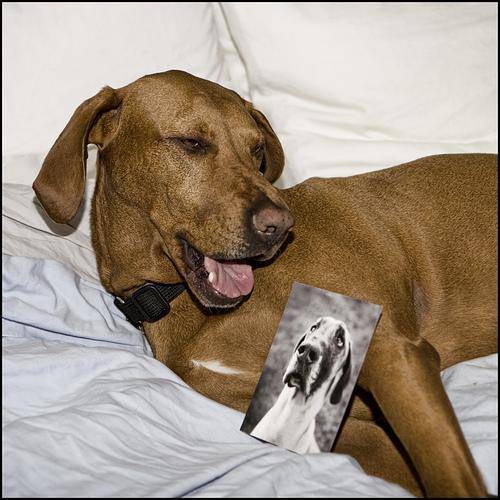

In [6]:
 # checkout that it work fine or not
 Image(filenames[100])

In [ ]:
data['breed'][100]

'rhodesian_ridgeback'

In [7]:
# prepare our labels
import numpy as np
labels = data['breed']
labels = np.array(labels)

In [ ]:
# see labels matches with the actual images
if len(labels) == len(filenames):
  print("matches")
else:
  print("not matches")


matches


In [8]:
# checkout unique breeds
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# turn single label into array of booleans
print(labels[5])
labels[5] == unique_breeds

bedlington_terrier


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [9]:
 # turn every label into array of booleans
boolean_labels = [label == unique_breeds for label in labels]

In [ ]:
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[1000])
print(boolean_labels[1000].astype(int))

irish_setter
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [10]:
# make x and y variables
x = filenames
y = boolean_labels

In [12]:
# reduce number of images for experimenting
IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [13]:
 # split our data into train and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:IMAGES],
                                                  y[:IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
x_train[:5], y_train[:5]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (Turning Into Tensors)

In [14]:
#sample how a image looks after converting into tensors
from matplotlib.pyplot import imread
image = imread(filenames[5])
image.shape

(375, 500, 3)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[143, 136, 144],
        [141, 134, 142],
        [143, 136, 144],
        ...,
        [ 82,  73,  76],
        [ 85,  76,  79],
        [ 79,  70,  73]],

       [[147, 140, 148],
        [140, 133, 141],
        [130, 123, 131],
        ...,
        [123, 117, 119],
        [127, 118, 121],
        [120, 114, 116]]], dtype=uint8)>

In [15]:
# image size
IMG_SIZE = 224

#function for preprocessing images
def process_images(image_path, img_size=IMG_SIZE):
  """
  takes an image file path and turns the image into Tensor.
  """
  # read image path
  image = tf.io.read_file(image_path)
  # turn the image into tensor with 3 colour channels(RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to desired value(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning Our Data Into Batches

Because if we try to process 10,000 images at a time, they all might not fit into memory.

Data in the form of Tensor tuples.

In [16]:
# create a function to return a tuple

def get_image_label(image_path, label):
  """
  takes an image file path and the label, processes the image and returns a tuple.
  """
  image = process_images(image_path)
  return image, label

Upper function is a way to turn data into tuples of tensors. Now make a function which turns all of the data into batches.

In [17]:
# define batch size
BATCH_SIZE = 32

# create a function to turn data into batches.
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label(y) pairs.
  Shuffle if it is training data.
  Also accepts its test data(no labels)
  """
  # if the data is test data, we probably don't have labels.
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch

  # if the data is validation dataset, we don't need to shuffle it.
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    #shuffling pathnames and labels before mapping
    data = data.shuffle(buffer_size=len(x))

    #create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    #turn the trainig data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [18]:
#creating training and validation data batches.
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches..
Creating validation data batches..


In [ ]:
#different attributes of our data
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [19]:
import matplotlib.pyplot as plt

#function for viewing images in a data batch
def show_images(images, labels):
  """

  """
  plt.figure(figsize=(10,10))
  #loop through 20 images
  for i in range(20):
    #create subplots
    ax = plt.subplot(5,5, i+1)
    #display an image
    plt.imshow(images[i])
    #add image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn grid lines off
    plt.axis('off')

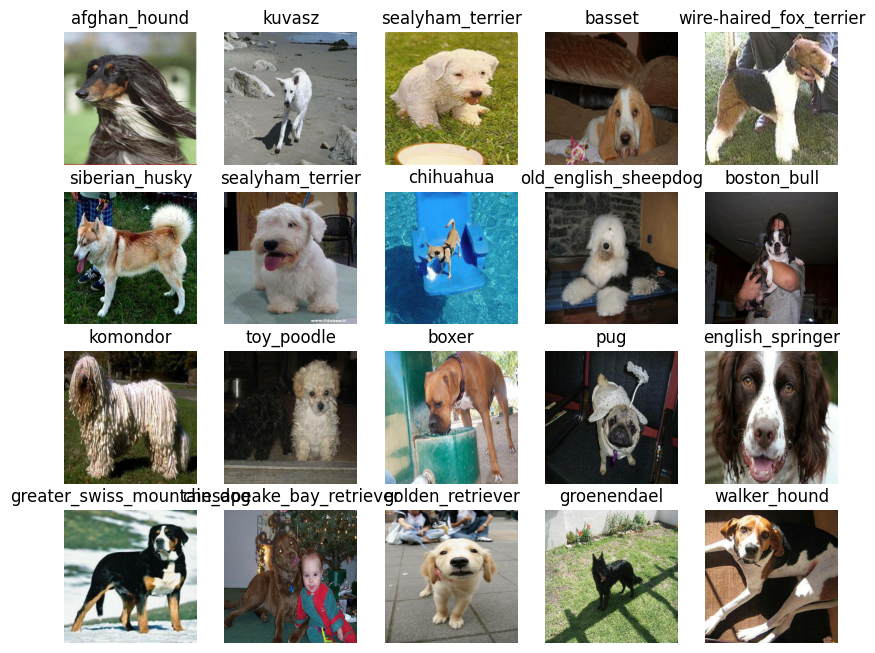

In [20]:
#now visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

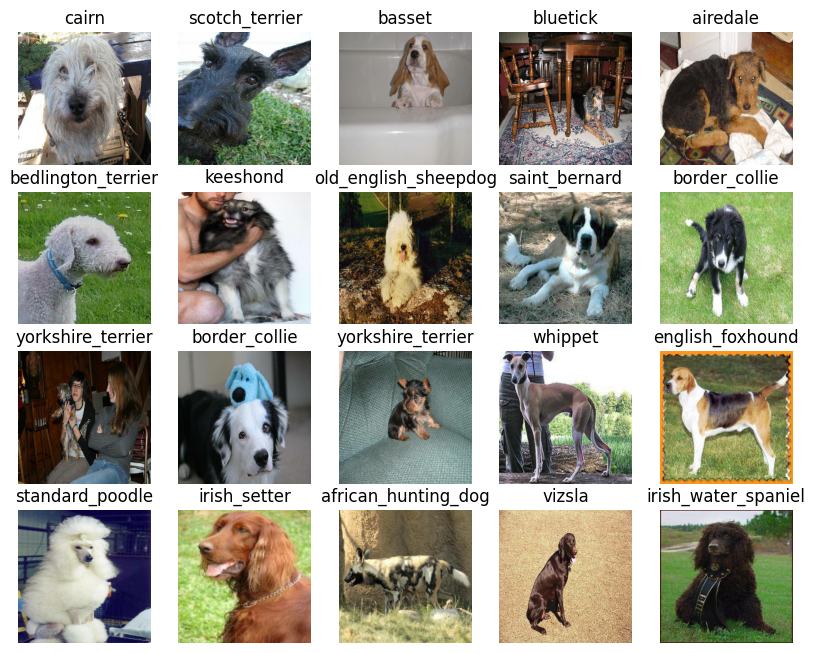

In [21]:
#now visualize data in a validation batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

## Building A Model

Before building the model, we would to define:

* the input shape(our images shape in the form of tensors) to the model.
* the output shape(our labels shape in the form of tensors) to the model.
* the URL of the model we want to use from Tensorflow Hub.

In [22]:
#setup input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

#setup output shape
OUTPUT_SHAPE = len(unique_breeds)

#setup model url
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/tensorFlow2/variations/130-224-classification"

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      